# Summary

In this Notebook I:

1. Prepare the model
2. Try 3 different ML algorithms.
3. Evalute the accuracy of the various models.
4. Refine to minimize false positives.
5. Find the top 10 most important features.

## Preparing the Model

In [1]:
import pandas as pd
%pylab inline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import (r2_score, mean_absolute_error, accuracy_score,
                             precision_score, recall_score)

Populating the interactive namespace from numpy and matplotlib


This model considers only categories and location to start out with

In [2]:
df = pd.read_hdf('../data/ready_businesses')

In [65]:
# add city later
train_columns = ['neighbor_success', 'American (New)', 'American (Traditional)',
       'Arts & Entertainment', 'Asian Fusion', 'Bagels', 'Bakeries',
       'Barbeque', 'Bars', 'Breakfast & Brunch', 'British', 'Buffets',
       'Burgers', 'Cafes', 'Canadian (New)', 'Caterers', 'Chicken Wings',
       'Chinese', 'Coffee & Tea', 'Delis', 'Desserts', 'Diners',
       'Event Planning & Services', 'Fast Food', 'Food', 'French',
       'Gastropubs', 'German', 'Gluten-Free', 'Greek', 'Grocery', 'Hawaiian',
       'Hot Dogs', 'Ice Cream & Frozen Yogurt', 'Indian', 'Italian',
       'Japanese', 'Juice Bars & Smoothies', 'Korean', 'Latin American',
       'Lounges', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Nightlife',
       'Pizza', 'Pubs', 'Restaurants', 'Salad', 'Sandwiches', 'Seafood',
       'Southern', 'Specialty Food', 'Sports Bars', 'Steakhouses',
       'Sushi Bars', 'Tex-Mex', 'Thai', 'Vegan', 'Vegetarian', 'Vietnamese',
       'Wine Bars']

In [5]:
df.loc[df.success_metric > 16, 'successful'] = 1
df.successful = df.successful.fillna(0)

In [6]:
X = df[train_columns]
y = df.successful

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.15)

In [8]:
len(train_X), len(test_X)

(19329, 3412)

# Classification 

Classification makes more sense. We want to know $P(Successful \mid X)$

In [9]:
from sklearn.svm import SVC

Setting the `class_weight` parameter makes it deal with unbalanced data by Default

In [10]:
clf = SVC(class_weight='balanced')

In [11]:
sum(df.successful) / len(df)

0.25368277560353547

In [12]:
clf.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
svc_predictions = clf.predict(test_X)

In [14]:
accuracy_score(test_y, np.zeros(len(test_y)))

0.74091441969519345

In [15]:
accuracy_score(test_y, svc_predictions)

0.68757327080890973

In [16]:
precision_score(test_y, svc_predictions)

0.43229166666666669

## Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfclf = RandomForestClassifier(n_estimators=200, min_samples_split=10, oob_score=True,
                              n_jobs=-1, class_weight='balanced')

In [41]:
rfclf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [42]:
feature_imp = rfclf.feature_importances_

In [43]:
keys = list(train_X.columns)

In [44]:
sorted(list(zip(keys, feature_imp)), key=lambda x: x[1], reverse=True)[:10]

[('neighbor_success', 0.53551291306140258),
 ('Fast Food', 0.086531055084112796),
 ('Burgers', 0.036149770492697936),
 ('Sandwiches', 0.03059984662617735),
 ('Chicken Wings', 0.018008782588737223),
 ('American (Traditional)', 0.014852877465737761),
 ('Pizza', 0.012623425200089572),
 ('American (New)', 0.012610023129585091),
 ('Mexican', 0.011275814571721943),
 ('Food', 0.010640079825836733)]

### The direction of the moves

1. Fast Food: Positive
2. Burgers Positive
3. Sandwhiches Positive
4. Chicken Wings: Positive
5. Pizza: Complicated
6. American (Complicated)
7. Mexican: Complicated
8. Tex-Mex Positive

In [45]:
df[df['American (New)'] == 1].successful.mean()

0.25167336010709507

In [46]:
rf_pred = rfclf.predict(test_X)

In [47]:
rfclf.oob_score_

0.76227430286098607

In [48]:
precision_score(test_y, rf_pred)

0.55889145496535797

In [49]:
accuracy_score(test_y, rf_pred) 

0.77080890973036342

In [50]:
recall_score(test_y, rf_pred)

0.54751131221719462

In [66]:
categories = train_columns[1:]

In [68]:
print([(i, i ) for i in categories])

[('American (New)', 'American (New)'), ('American (Traditional)', 'American (Traditional)'), ('Arts & Entertainment', 'Arts & Entertainment'), ('Asian Fusion', 'Asian Fusion'), ('Bagels', 'Bagels'), ('Bakeries', 'Bakeries'), ('Barbeque', 'Barbeque'), ('Bars', 'Bars'), ('Breakfast & Brunch', 'Breakfast & Brunch'), ('British', 'British'), ('Buffets', 'Buffets'), ('Burgers', 'Burgers'), ('Cafes', 'Cafes'), ('Canadian (New)', 'Canadian (New)'), ('Caterers', 'Caterers'), ('Chicken Wings', 'Chicken Wings'), ('Chinese', 'Chinese'), ('Coffee & Tea', 'Coffee & Tea'), ('Delis', 'Delis'), ('Desserts', 'Desserts'), ('Diners', 'Diners'), ('Event Planning & Services', 'Event Planning & Services'), ('Fast Food', 'Fast Food'), ('Food', 'Food'), ('French', 'French'), ('Gastropubs', 'Gastropubs'), ('German', 'German'), ('Gluten-Free', 'Gluten-Free'), ('Greek', 'Greek'), ('Grocery', 'Grocery'), ('Hawaiian', 'Hawaiian'), ('Hot Dogs', 'Hot Dogs'), ('Ice Cream & Frozen Yogurt', 'Ice Cream & Frozen Yogurt'),

In [54]:
in_sample_pred = rfclf.predict(train_X)

In [ ]:
df.columns

# Confusion 

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/Users/Will/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


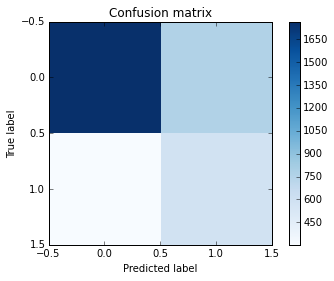

In [33]:
plot_confusion_matrix(confusion_matrix(test_y, svc_predictions))

/Users/Will/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


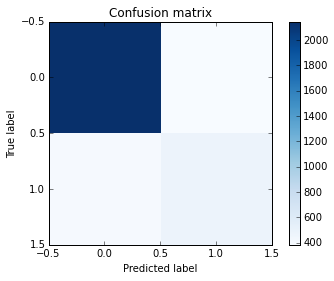

In [51]:
plot_confusion_matrix(confusion_matrix(test_y, rf_pred))

In [53]:
382 / (190 + 382)

0.6678321678321678

In [35]:
cm = confusion_matrix(test_y, rf_pred)

In [61]:
from sklearn.externals import joblib
joblib.dump(rf_pred, '../models/rf.pkl')

['../models/rf.pkl', '../models/rf.pkl_01.npy']

In [55]:
cm_in_sample = confusion_matrix(train_y, in_sample_pred)

In [56]:
cm

array([[2338,  190],
       [ 502,  382]])

In [57]:
cm_in_sample

array([[13377,  1067],
       [  762,  4123]])

In [59]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [60]:
cm_normalized

array([[ 0.92484177,  0.07515823],
       [ 0.5678733 ,  0.4321267 ]])

If predicted in top 25%, it will be in the top 25% 61% of the time.

# Extensions

- The next iteration of modeling will include features derived from the textual reviews. 
- I should also use
- This could be the first part of my 